In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# Load data
df = pd.read_csv("../data/hour.csv")

# Feature engineering (if needed)
df['atemp'] = df['atemp'] * 50
df['hum'] = df['hum'] * 100
df['windspeed'] = df['windspeed'] * 67

# Drop unused columns
df = df.drop(['casual', 'registered', 'dteday', 'instant'], axis=1)

# Define features (X) and target (y)
X = df.drop(['cnt'], axis=1)
y = df['cnt']

# Identify categorical columns (XGBoost will handle them internally)
categorical_cols = ['season', 'mnth', 'hr', 'weekday', 'weathersit']

# Convert to Pandas 'category' dtype (optimizes XGBoost)
for col in categorical_cols:
    X[col] = X[col].astype('category')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize model (with basic hyperparameters)
model = XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,       # Tree depth (control complexity)
    learning_rate=0.1, # Step size shrinkage
    random_state=42,
    enable_categorical=True  # Essential for categorical support!
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.95


In [10]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(XGBRegressor(enable_categorical=True), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best R²:", grid.best_score_)

Best params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best R²: 0.9469375610351562


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

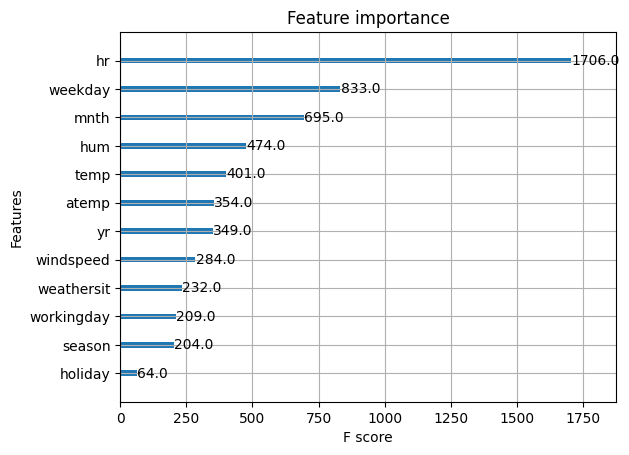

In [15]:
plot_importance(model)


In [16]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R²: {train_r2:.2f}, Test R²: {r2:.2f}")

Train R²: 0.97, Test R²: 0.95
